aka **CART**: Classification And Regression Trees

### What are Decision Trees?
- Remember that classification is a **supervised machine learning** process. That means we train on labeled data.
- In Decision Trees, we use the training data to train the tree to find a decision boundary to use as a **decision rule** for future data.
- Decision trees are like playing "20 Questions" with your features used to predict the target. Each question is a "Yes" or a "No". That number of questions is the **depth of your tree**.
- Given enough depth, decision trees are **overfitting** machines.

### About Decision Trees
- A sequence of rules that can be used to classify 2 or more classes
- Each node represents a single input variable (x) and a split point or class of that variable
- The leaf nodes of the tree contain an output variable (y) which is used to make a prediction.
- Predictions are made by walking the splits of the tree until arriving at a leaf node and output the class value at that leaf node.

### A Sample Titanic Decision Tree
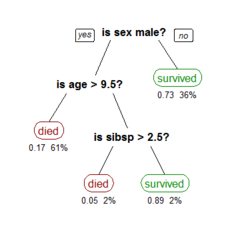

### Pros of Decision Trees
1. Simple to understand
2. Simple to visualize
3. Simple to explain the output
4. Requires little data preparation
5. We don't need to encode our target variable
6. Perform well for a broad range of problems

### Cons of Decision Trees
1. Can create complex trees that do not generalise well.
2. Can be unstable because small variations in the data might lead to overfitting.

### How it works
- Classification algorithms use training data to measure the distance between points or the distance around boundaries between points.
- By "learning" the pattern recognition around sets of labeled points, the classifier produces a **decision rule** to use to apply to classify new incoming data.

### Example
- Iris dataset: Identifing the iris species based on 4 measurements.
- This algorithm is quite simple. The idea is to take the observations and split them into subcategories until we have a tree showing us how to classify something.

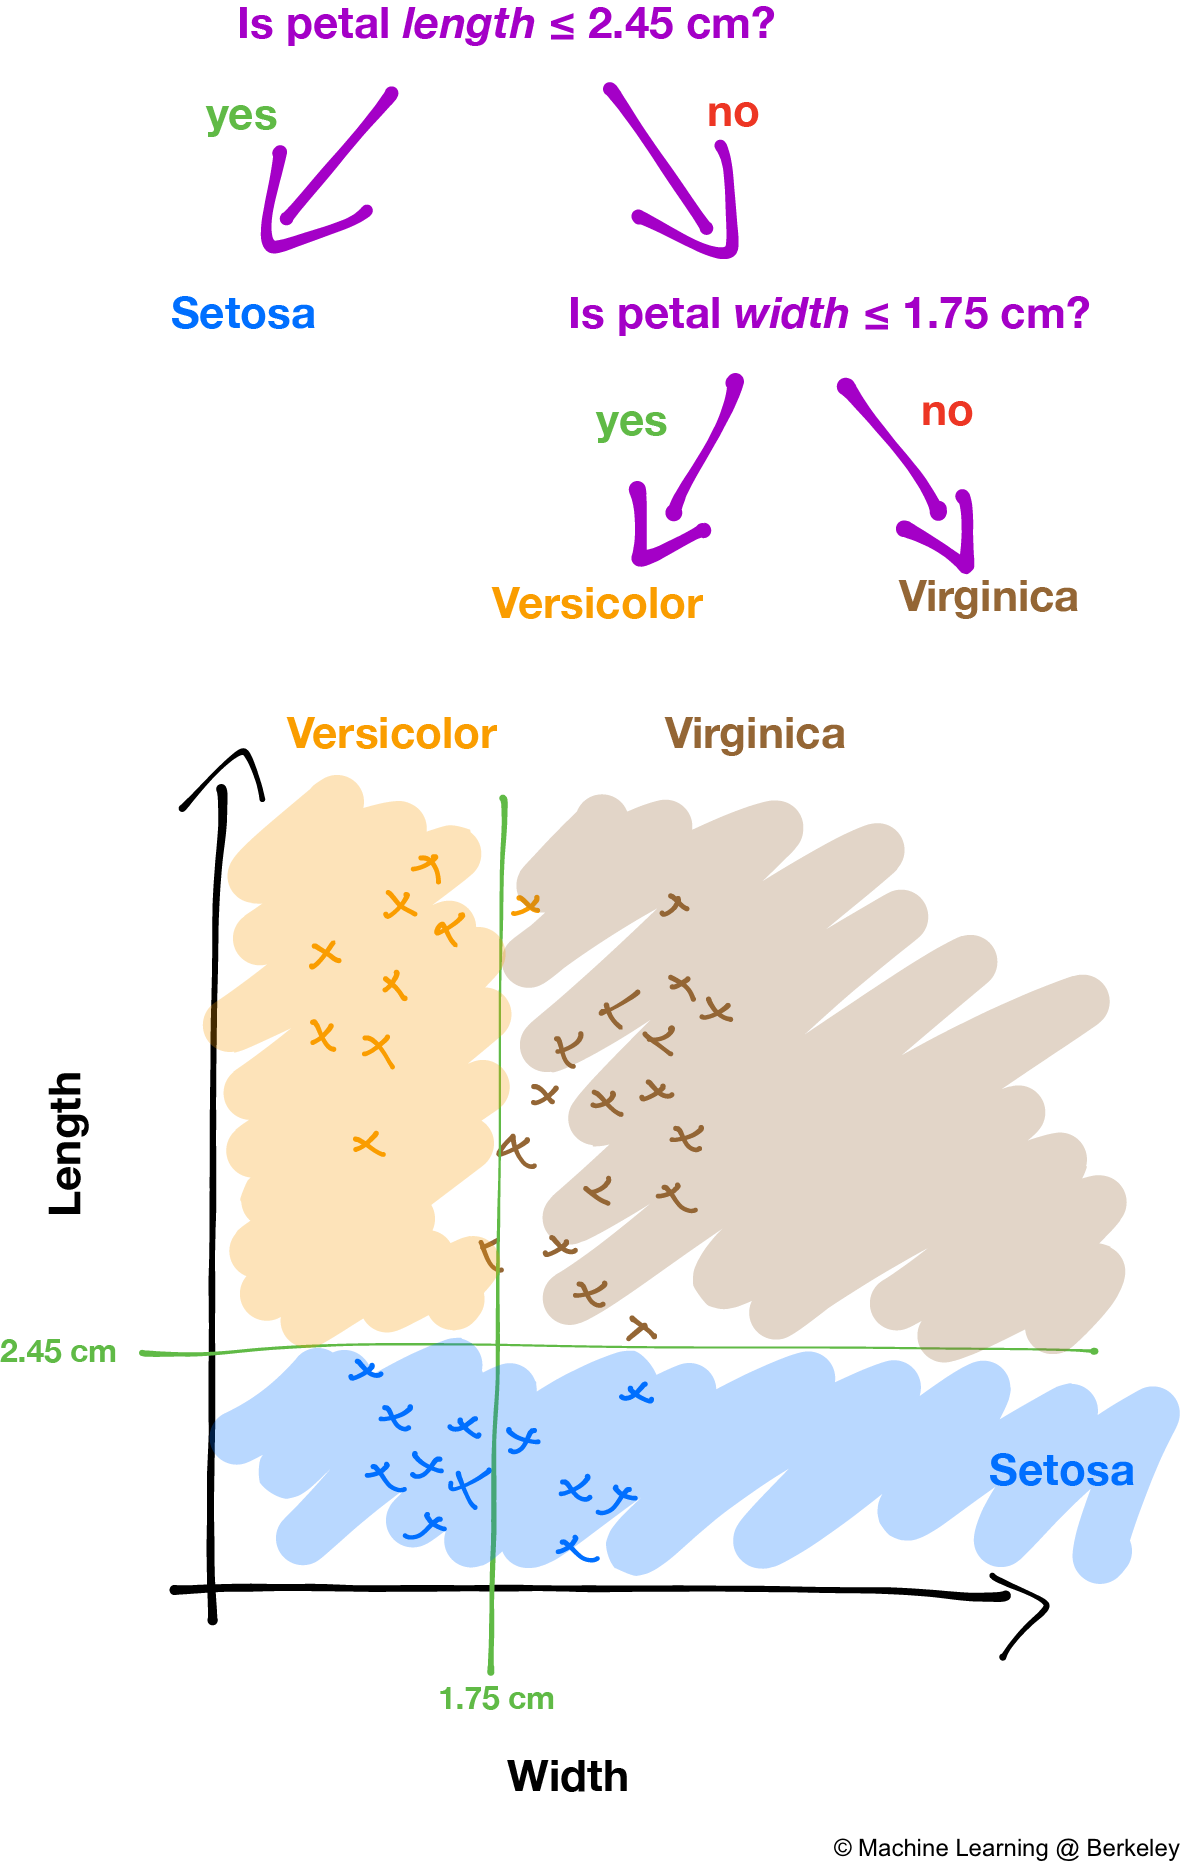

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = data('iris')
df.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa
4           4.6          3.1           1.5          0.2  setosa
5           5.0          3.6           1.4          0.2  setosa

Let's cleanup the column names a bit:

In [5]:
df.columns = [col.lower().replace('.', '_') for col in df]

## Train Validate Test
Now we'll do our train/validate/test split: - We'll do exploration and train our model on the `train` data - We tune our model on `validate`, since it will be out-of-sample until we use it. - And keep the `test` nice and safe and separate, for our final out-of-sample dataset, to see how well our tuned model performs on new data.

In [6]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [7]:
train, validate, test = train_validate_test_split(df, target='species', seed=123)

X_train = train.drop(columns=['species'])
y_train = train.species

X_validate = validate.drop(columns=['species'])
y_validate = validate.species

X_test = test.drop(columns=['species'])
y_test = test.species

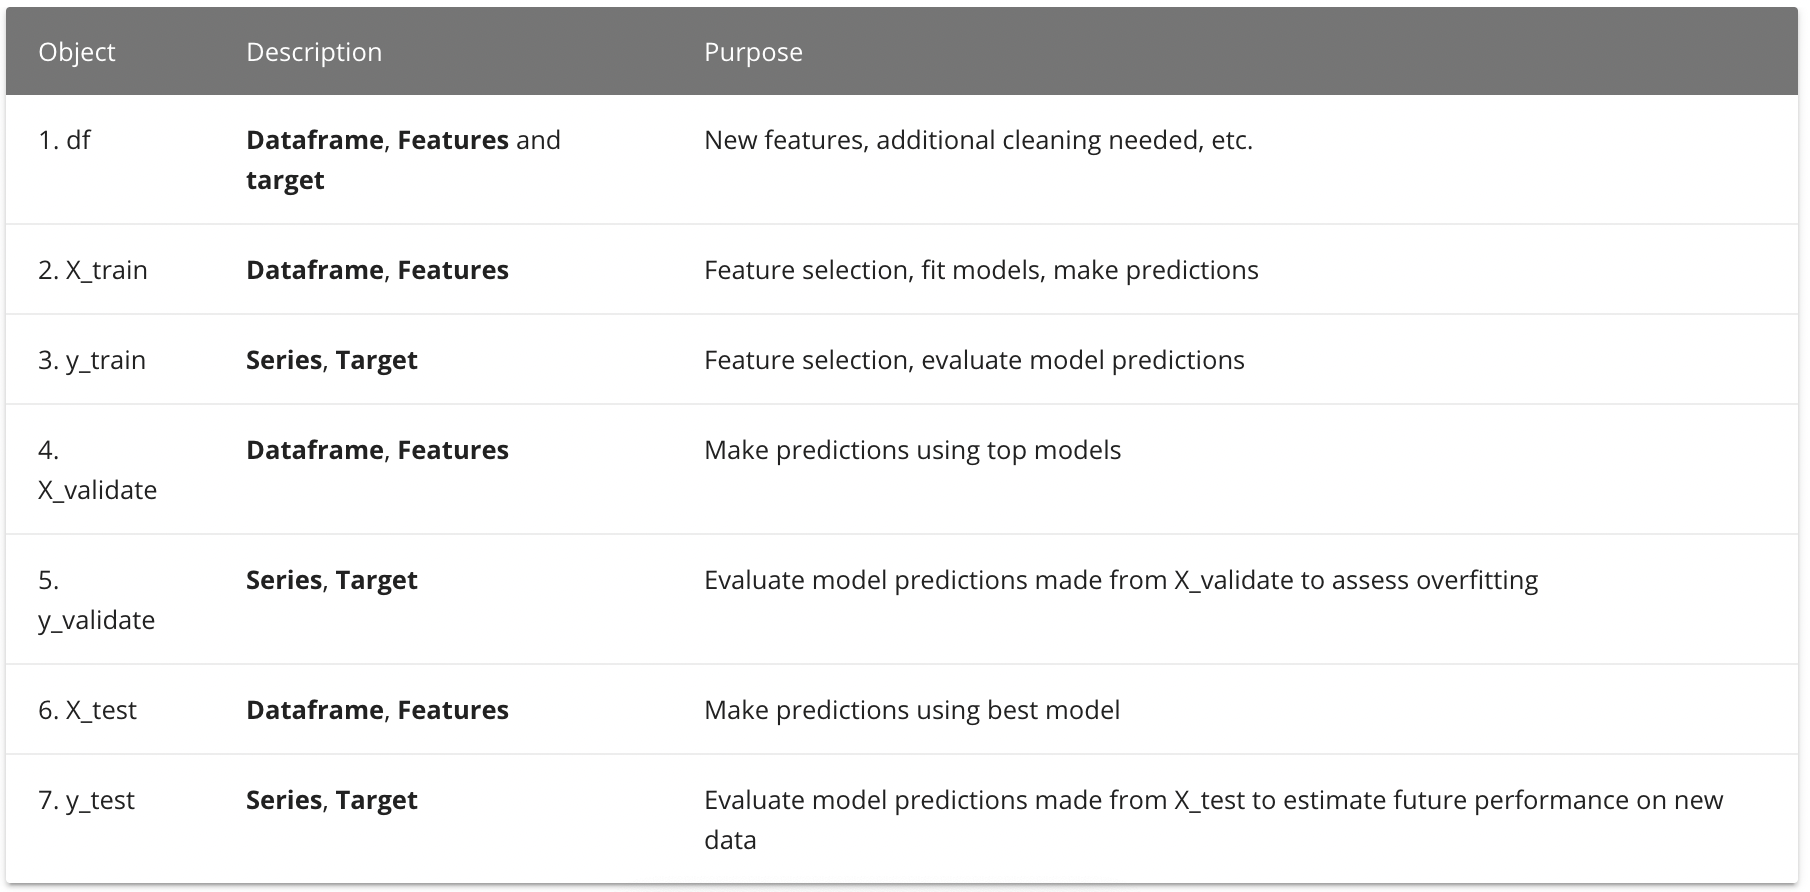

## Train Model
### Create the Decision Tree Object

In [8]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=3, random_state=123)

### Fit the model to the training data

In [9]:
# model.fit(X, y)

clf = clf.fit(X_train, y_train)

### Visualize the model
Install graphviz

In [12]:
import graphviz
from graphviz import Graph


In [ ]:
dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('iris_decision_tree', view=True)

### Estimate species
Make predictions using our newly fit model.

In [14]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

### Estimate the probability of a species
Get prediction probabilities for each class for each observation in train.

In [ ]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

## Evaluate Model
### Compute the Accuracy
**Accuracy**: number of correct predictions over the number of total instances that have been evaluated.

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

### Create a confusion matrix
- **True Positive**: 
    - number of occurrences where y is true and y is predicted true.
- **True Negative**: 
    - number of occurrences where y is false and y is predicted false.
- **False Positive**: 
    - number of occurrences where y is false and y is predicted true.
- **False Negative**: 
    - number of occurrences where y is true and y is predicted false.

In [15]:
# confusion matrix

confusion_matrix(y_train, y_pred)

array([[28,  0,  0],
       [ 0, 27,  1],
       [ 0,  2, 26]])

In [16]:
y_train.value_counts()

versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64

In [17]:
import pandas as pd

labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

setosa  versicolor  virginica
setosa          28           0          0
versicolor       0          27          1
virginica        0           2         26

### Create a classification report
- **Precision**: 
    - the higher this number is, the more you were able to pinpoint all positives correctly. If this is a low score, you predicted a lot of positives where there were none. tp / (tp + fp)
- **Recall**: 
    - if this score is high, you didn’t miss a lot of positives. But as it gets lower, you are not predicting the positives that are actually there. tp / (tp + fn)
- **f1-score**: 
    - The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better.
- **Support**: 
    - number of occurrences of each class in where y is true.

In [18]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.93      0.96      0.95        28
   virginica       0.96      0.93      0.95        28

    accuracy                           0.96        84
   macro avg       0.96      0.96      0.96        84
weighted avg       0.96      0.96      0.96        84



## Evaluate the Model with our Validate dataset
### Compute the accuracy of the model when run on the validate data
- Because we didn't do exploration or train on `validate`, it is "out-of-sample".
- Evaluating on `validate` means we're learning how well the model does on new data.

In [19]:
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on test set: 0.94


## Avoid Overfitting
- Obtain more training data (this is always the first answer)
- Feature engineering
- The simplest approach is to set your max_depth argument to a lower integer)
- Some other concepts:
    - Use a validate split to ensure we're not overfitting hyperparameters on train
    - Tree pruning
        - Pre-modeling - setting max depth before training your model (or training your model then cranking down the max_depth)
        - Post modeling pruning - go for totally overfit, then then prune that overfit tree. sklearn goes into more detail https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py
- For more on validate and test sets, see https://machinelearningmastery.com/difference-test-validation-datasets/

## Further Resources
- For more detail on decision trees, see https://scikit-learn.org/stable/modules/tree.html